## Week 5 IPL Data Set Analysis

In [57]:
#Imports and Data Pre-Processing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('matches.csv')

In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [64]:
df2 = pd.read_csv('deliveries.csv')

In [6]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [7]:
df1.shape

(756, 18)

In [8]:
df2.shape

(8995, 21)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          8995 non-null   int64  
 1   inning            8995 non-null   int64  
 2   batting_team      8995 non-null   object 
 3   bowling_team      8994 non-null   object 
 4   over              8994 non-null   float64
 5   ball              8994 non-null   float64
 6   batsman           8994 non-null   object 
 7   non_striker       8994 non-null   object 
 8   bowler            8994 non-null   object 
 9   is_super_over     8994 non-null   float64
 10  wide_runs         8994 non-null   float64
 11  bye_runs          8994 non-null   float64
 12  legbye_runs       8994 non-null   float64
 13  noball_runs       8994 non-null   float64
 14  penalty_runs      8994 non-null   float64
 15  batsman_runs      8994 non-null   float64
 16  extra_runs        8994 non-null   float64


In [11]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,8995.000000,8995.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.0,8994.000000,8994.000000,8994.000000
mean,19.378877,1.479600,10.126862,3.614854,0.001445,0.036802,0.003224,0.019013,0.003558,0.0,1.306315,0.062597,1.368913
std,10.924920,0.506024,5.680553,1.806122,0.037993,0.243409,0.084956,0.165308,0.063170,0.0,1.641136,0.309197,1.622973
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,10.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,19.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,29.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,38.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,2.000000,0.0,6.000000,5.000000,7.000000


In [13]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
#Dropping Umpire 3 column since too many null values
df1 = df1.drop(columns=['umpire3'], axis=1)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [16]:
df2.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           1
over                   1
ball                   1
batsman                1
non_striker            1
bowler                 1
is_super_over          1
wide_runs              1
bye_runs               1
legbye_runs            1
noball_runs            1
penalty_runs           1
batsman_runs           1
extra_runs             1
total_runs             1
player_dismissed    8541
dismissal_kind      8541
fielder             8687
dtype: int64

In [17]:
#df2 = df2.drop(columns=['player_dismissed', 'dismissal_kind', 'fielder'], axis=1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       8995 non-null   int64  
 1   inning         8995 non-null   int64  
 2   batting_team   8995 non-null   object 
 3   bowling_team   8994 non-null   object 
 4   over           8994 non-null   float64
 5   ball           8994 non-null   float64
 6   batsman        8994 non-null   object 
 7   non_striker    8994 non-null   object 
 8   bowler         8994 non-null   object 
 9   is_super_over  8994 non-null   float64
 10  wide_runs      8994 non-null   float64
 11  bye_runs       8994 non-null   float64
 12  legbye_runs    8994 non-null   float64
 13  noball_runs    8994 non-null   float64
 14  penalty_runs   8994 non-null   float64
 15  batsman_runs   8994 non-null   float64
 16  extra_runs     8994 non-null   float64
 17  total_runs     8994 non-null   float64
dtypes: float

### Q1 Total Number of matches conducted in 2008

In [19]:
df1.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [20]:
len(df1.loc[df1['season'] == 2008])

58

### Q2 Find city name with max and min number of matches conducted

In [21]:
df1['city'].value_counts().nlargest(1)

Mumbai    101
Name: city, dtype: int64

In [22]:
df1['city'].value_counts().nsmallest(1)

Bloemfontein    2
Name: city, dtype: int64

### Q3 Find the total count of the matches city wise

In [23]:
df1['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

### Q4 Find team which is max and min toss winner

In [24]:
df1['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [25]:
df1['toss_winner'].value_counts().nlargest(1)

Mumbai Indians    98
Name: toss_winner, dtype: int64

In [26]:
df1['toss_winner'].value_counts().nsmallest(1)

Rising Pune Supergiant    6
Name: toss_winner, dtype: int64

### Q5 Check the toss decision the team has taken

In [62]:
df1.groupby(df1['toss_winner']).toss_decision.value_counts()['Mumbai Indians']

toss_decision
field    54
bat      44
Name: toss_decision, dtype: int64

In [63]:
df1.groupby(df1['toss_winner']).toss_decision.value_counts()['Rising Pune Supergiant']

toss_decision
field    6
Name: toss_decision, dtype: int64

### Q6 Count total number of normal and tie matches

In [28]:
df1['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

### Q7 Find the team name where the match result is a tie

In [29]:
df1.loc[df1['result'] == "tie", ['team1', 'team2']]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab
705,Kolkata Knight Riders,Delhi Capitals
746,Mumbai Indians,Sunrisers Hyderabad


### Q8 Find team name who won the match by the highest runs

In [30]:
df1.nlargest(1, ['win_by_runs'])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


### Q9 Find the team name who won the match by lowest runs

In [31]:
df1.nsmallest(1, ['win_by_runs'])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [32]:
#Data cleaning since you can not win by 0 runs

In [33]:
df1['win_by_runs'] = df1['win_by_runs'].replace(0, np.nan)

In [34]:
df1['win_by_runs'].nsmallest(5)

58     1.0
105    1.0
163    1.0
344    1.0
350    1.0
Name: win_by_runs, dtype: float64

In [35]:
df1.nsmallest(1, ['win_by_runs'])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1.0,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


### Q10 Find the player awarded player of the match more than 3 times

In [36]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,NaN,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,NaN,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,NaN,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [37]:
df1['player_of_match'].value_counts() > 3

CH Gayle           True
AB de Villiers     True
RG Sharma          True
DA Warner          True
MS Dhoni           True
                  ...  
JD Ryder          False
A Joseph          False
AD Mathews        False
DJ Hooda          False
S Gill            False
Name: player_of_match, Length: 226, dtype: bool

### Q11 Find player awarded player of the match maximum times

In [38]:
df1['player_of_match'].value_counts().nlargest(1)

CH Gayle    21
Name: player_of_match, dtype: int64

### Q12 Find the venue where the team won the match by highest runs

In [39]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35.0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,NaN,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,NaN,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,NaN,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15.0,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [40]:
df1.loc[df1['win_by_runs'].nlargest(1), 'venue']

146.0    SuperSport Park
Name: venue, dtype: object

### Q13 Find the venue where team won match by lowest runs

In [41]:
df1.loc[df1['win_by_runs'].nsmallest(1), 'venue']

1.0    Maharashtra Cricket Association Stadium
Name: venue, dtype: object

### Q14 Find the umpires who did umpiring maximum times

In [42]:
df1['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SL Shastri          1
A Nanda Kishore     1
Nanda Kishore       1
Sundaram Ravi       1
SJA Taufel          1
Name: umpire1, Length: 61, dtype: int64

In [43]:
#Most frequest umpire 1
df1['umpire1'].value_counts().nlargest(1)

HDPK Dharmasena    73
Name: umpire1, dtype: int64

In [44]:
#Most frequent umpire 2
df1['umpire2'].value_counts().nlargest(1)

S Ravi    57
Name: umpire2, dtype: int64

### Q15 Find the total matches played in each season

In [45]:
df1['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

### Q16 Find the total runs in each season

In [49]:
df2.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [50]:
df2.rename(columns = {'match_id':'id'}, inplace = True)
df3 = pd.merge(df1,df2,on='id')
df3

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,38,2017,Pune,2017-05-01,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,Basil Thampi,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8991,38,2017,Pune,2017-05-01,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,Basil Thampi,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0
8992,38,2017,Pune,2017-05-01,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,Basil Thampi,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8993,38,2017,Pune,2017-05-01,Gujarat Lions,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,JP Faulkner,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0


In [53]:
df3.groupby(by=df3.season).sum().total_runs

season
2017    12312.0
Name: total_runs, dtype: float64

### Q17 Find the number of tosses won by each team

In [54]:
toss = df1['toss_winner'].value_counts().nlargest(15)
toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Tosses won by each team')

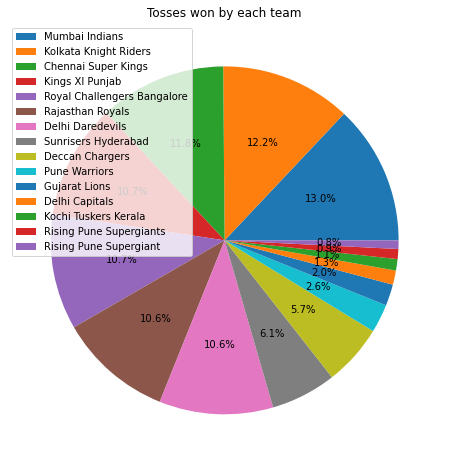

In [58]:
fig, axs = plt.subplots(figsize = (8,8))
plt.pie(toss,autopct='%1.1f%%')
plt.legend(toss.index)
plt.title("Tosses won by each team")

### Q18 Visualise the toss decision across seasons

In [59]:
pd.crosstab(df1.season,df1.toss_decision)

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


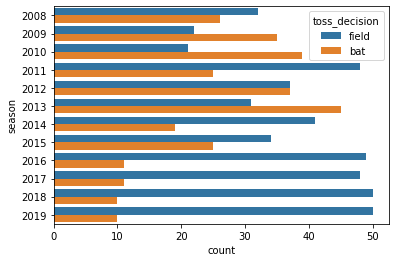

In [60]:
sns.countplot(data = df1,  y = df1.season,hue = df1['toss_decision'])

### Q19 Find the dismissal kind and visualize using best fit graph

In [65]:
data=df2['dismissal_kind'].value_counts()
data

caught               259
bowled                88
lbw                   39
run out               36
caught and bowled     18
stumped               13
retired hurt           1
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'GRAPH OF DISMISSMAL KINDS')

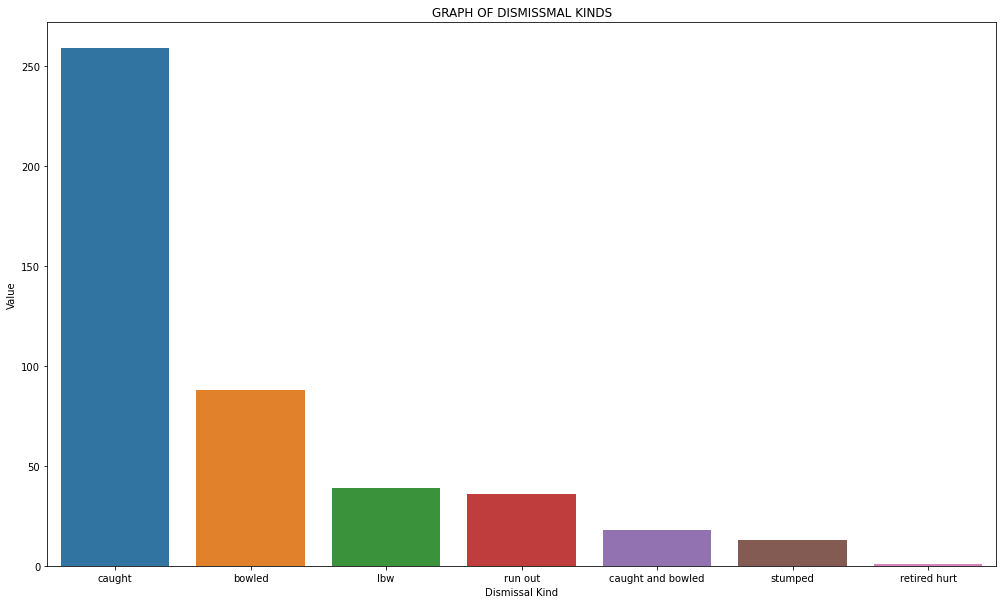

In [66]:
fig, axs = plt.subplots(figsize = (17,10))
sns.barplot(x=data.index,y=data.values)
plt.xlabel("Dismissal Kind")
plt.ylabel("Value")
plt.title("GRAPH OF DISMISSMAL KINDS")

### Q20 Find top 10 run scorers

In [67]:
bats_man = df2.groupby('batsman').total_runs.sum().nlargest(10)
bats_man 

batsman
DA Warner      483.0
G Gambhir      410.0
RV Uthappa     409.0
S Dhawan       355.0
BB McCullum    333.0
SPD Smith      332.0
HM Amla        330.0
N Rana         328.0
SK Raina       328.0
MK Pandey      317.0
Name: total_runs, dtype: float64

In [68]:
df1['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Top 10 run scorers')

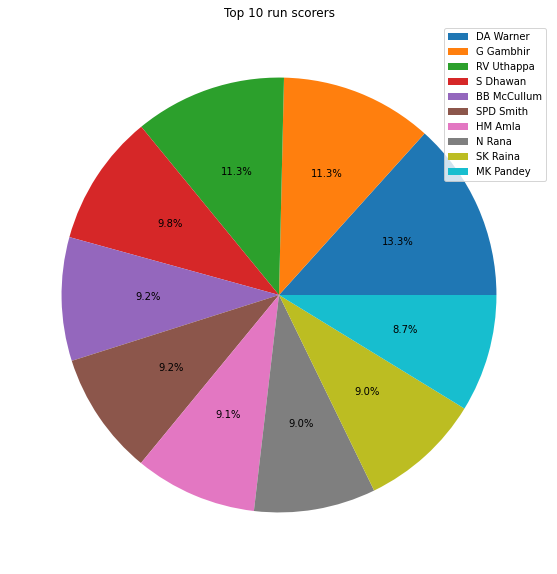

In [69]:
fig, axs = plt.subplots(figsize = (10,10))
plt.pie(bats_man,autopct='%1.1f%%')
plt.legend(bats_man.index)
plt.title("Top 10 run scorers")

### Q21 Visualize highest Man OF Match winners

Text(0.5, 1.0, 'THE HIGHEST MOM AWARD WINNERS')

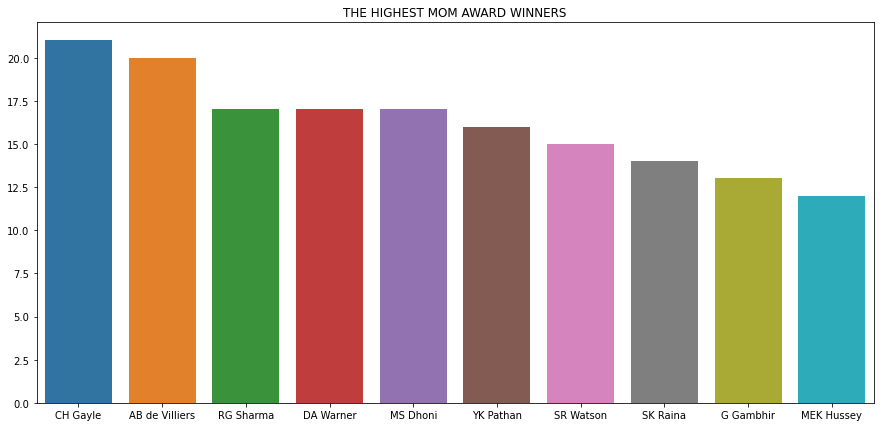

In [70]:
data1=df1['player_of_match'].value_counts()
data1=data1[0:10]
fig, axs = plt.subplots(figsize = (15,7))
sns.barplot(x=data1.index,y=data1.values)
plt.title("THE HIGHEST MOM AWARD WINNERS")

### Q22 Find total number of matches played by each team

In [73]:
data2=pd.concat([df1['team1'],df1['team2']],ignore_index=True,)
data2=data2.value_counts()
data2

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

### Q23 Compare Total Played Matches vs Winning Matches vs Win Rate 

In [74]:
rate=df1['winner'].value_counts()
rate=pd.concat([rate,data2],axis=1)
rate=rate.rename(columns={'winner':'Won',0:'Total'})
rate['Win Rate']=(rate['Won']/rate['Total'])*100
rate

,Won,Total,Win Rate
Mumbai Indians,109,187,58.288770
Chennai Super Kings,100,164,60.975610
Kolkata Knight Riders,92,178,51.685393
Royal Challengers Bangalore,84,180,46.666667
Kings XI Punjab,82,176,46.590909
Rajasthan Royals,75,147,51.020408
Delhi Daredevils,67,161,41.614907
Sunrisers Hyderabad,58,108,53.703704
Deccan Chargers,29,75,38.666667
Gujarat Lions,13,30,43.333333


### Q24 Find the Distribution of Won the Matches 

Text(0.5, 1.0, 'DISTRIBUTION OF WON MATCHES')

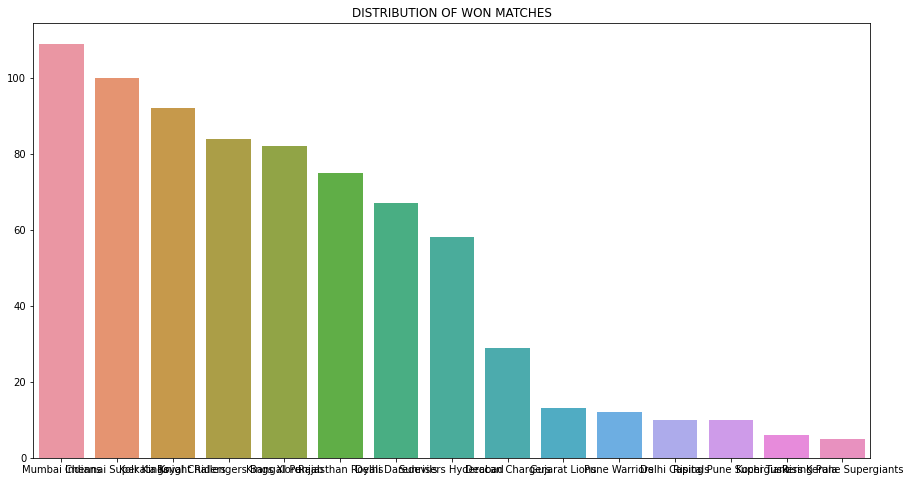

In [76]:
fig, axs = plt.subplots(figsize = (15,8))
sns.barplot(rate['Won'].index,rate['Won'].values,)
plt.title("DISTRIBUTION OF WON MATCHES")

### Q25 Ratio between total matches and total wins

In [77]:
rate['Ratio']=rate['Won']/rate['Total']
rate

,Won,Total,Win Rate,Ratio
Mumbai Indians,109,187,58.288770,0.582888
Chennai Super Kings,100,164,60.975610,0.609756
Kolkata Knight Riders,92,178,51.685393,0.516854
Royal Challengers Bangalore,84,180,46.666667,0.466667
Kings XI Punjab,82,176,46.590909,0.465909
Rajasthan Royals,75,147,51.020408,0.510204
Delhi Daredevils,67,161,41.614907,0.416149
Sunrisers Hyderabad,58,108,53.703704,0.537037
Deccan Chargers,29,75,38.666667,0.386667
Gujarat Lions,13,30,43.333333,0.433333


### Q26 Choice of each team after winning the toss

In [78]:
pd.crosstab(df1.toss_winner,df1.toss_decision)

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,2,8
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,26,55
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,62
Mumbai Indians,44,54
